#Exercise 1 - Sensitivity Analysis

##1. Introduction

In this exercise, you can analyse the sensitivity of a backscatter forward model to changes in the various input
parameters (e.g. soil texture, temperature, vegetation density).

##2. Model specification

You are going to use a semi-empirical model that combines the forest backscatter model of Pulliainen et al. (2003)
with the bare soil backscatter model of Oh et al. (1992), which is driven by the soil dielectric model of Dobson 
et al. (1985).

* Forest backscatter model (Pulliainen et al., 2003), 'sig_for':<br>
a function of incidence angle, vegetation water content, forest stem volume, and the bare soil backscatter<br>
The forest backscatter is the result of a 2-way extinction process, i.e. the sum of the canopy backscatter
('sig_canopy') and the backscatter from the forest floor ('sig_floor').
<br><br>
$$\sigma^0_{forest}\;=\;f(\theta,\Theta_v,V,\sigma^0_{bare})\;=\;\sigma^0_{canopy}\;+\;\sigma^0_{floor}$$
<br><br><br>

* Bare soil backscatter model (Oh et al., 1992), 'sig_bare':<br>
a function of incidence angle, soil dielectric constant, and the surface roughness (RMS-height with respect to the
signal wave length)
<br><br>
$$\sigma^0_{bare}\;=\;f(\theta,\varepsilon_S, ks)$$
<br><br><br>

* Soil dielectric model (Dobson et al., 1985), 'eps':<br>
a function of the signal frequency, sand- and clay content in the soil, soil temperature, and soil moisture
<br><br>
$$\varepsilon_S\;=\;f(f, S, C, T, \Theta_S)$$
<br><br><br>

In addition to the mentioned parameters, the backscatter models are defined for a specific signal polarisation and
depend on the signal frequency and incidence angle.<br><br>
Since you will apply the model later on data from the Advanced SCATterometer (ASCAT) onboard the MetOp-A satellite, 
you can restrict your analysis to the properties of this particular instrument, i.e., a signal frequency of 5.25 GHz 
(C-Band) in VV polarization with an incidence angle range from 25-65 degrees.

##3. Source code description

The following parameters can be set:
* x axis (parameter), x range (according to the chosen parameter, which can be any of the following, passed as a string)
* y axis (model), y range ('sig_for', 'sig_canopy', 'sig_floor', 'sig_bare', 'eps')
* theta: Incidence angle [degrees]
* freq: Frequency [GHz]
* sand, clay: Sand and clay content [%] (0-1)
* temp: Temperature [°C]
* m_soil: Relative soil moisture [%] (0-100)
* m_veg: Relative vegetation water content [%] (0-100)
* s_vol: Stem volume $[\frac{m^3}{ha}]$
* f_rms: Surface roughness $[\frac{s}{\lambda}]$ [-] 

##4. Code

In [ ]:
%matplotlib inline

In [ ]:
import forward_model as ue

In the next part of the exercise, the model input parameter values are defined.

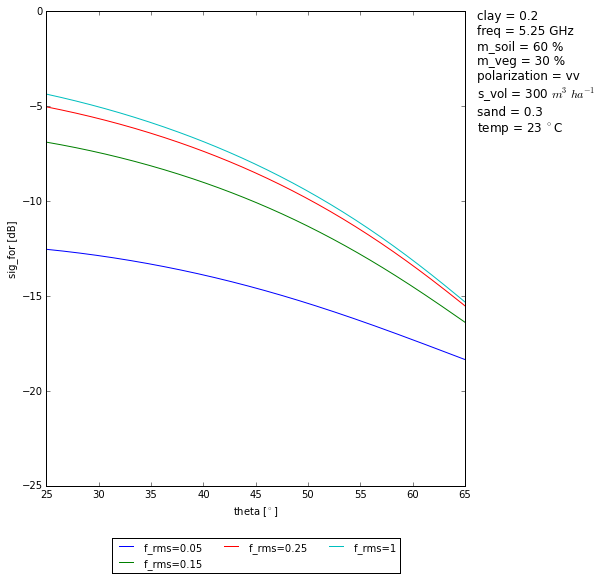

In [21]:
ue.plot('theta', [25, 65],                # values for x axis
        'sig_for', [-25,0],               # values for y axis
        freq = 5.25,
        sand = 0.3,
        clay = 0.2,
        temp = 23,
        m_soil = 60,
        m_veg = 30,
        s_vol = 300,
        f_rms = (0.05,0.15,0.25, 1))

Now click inside the code below and change a parameter value (e.g. s_vol), then run the code again (by clicking the "Run cell" button or hitting Shift+Enter). Compare your result to the above plot - if your chosen parameter has an impact on the backscatter behavior, the curves in the plot will have changed.

Note:
* 'eps' requires the frequency, temperature, sand-, and clay fraction, and soil moisture to be provided.
* Since 'sig_bare' is dependent on the soil dielectric constant, it requires the same parameters and, in addition,
the incidence angle and the surface roughness.
* 'sig_floor' and 'sig_for' are dependent on the bare soil backscatter model and require thus the same parameters, together with the relative vegetation water content and the stem volume.
* 'sig_canopy' only requires the latter two parameters and the incidence angle.
* Instead of providing the input parameters of the dielectric model to the backscatter models that are using
it, the dielectric constant (eps) can be provided directly.
<br><br>

Examples:
<br><br>
* 'eps'
<pre><code>
ue.plot('m_soil', [0, 100],
        'eps', [0, 100],
        freq = (5.25, 6, 10),
        sand = 0.3,
        clay = 0.2,
        temp = 23)
</code></pre>
* 'sig_bare'
<pre><code>
ue.plot('theta', [25, 65],
      'sig_bare', [-25,0],
      freq = 5.25,
      sand = 0.3,
      clay = 0.2,
      temp = 23,
      m_soil = 60,
      f_rms = (0.05,0.15,0.25, 1))
</code></pre>
* 'sig_for'
<pre><code>
ue.plot('theta', [25, 65],
        'sig_for', [-25,0],
        freq = 5.25,
        sand = 0.3,
        clay = 0.2,
        temp = 23,
        m_soil = 60,
        m_veg = 30,
        s_vol = 300,
        f_rms = (0.05,0.15,0.25, 1))
</code></pre>

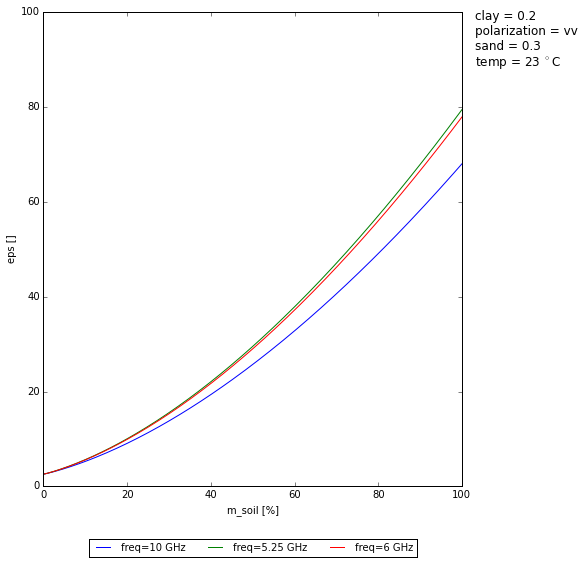

In [51]:
# Change the model type and parameter values here!

ue.plot('m_soil', [0, 100],
        'eps', [0, 100],
        freq = (5.25, 6, 10),
        sand = 0.3,
        clay = 0.2,
        temp = 23)

##5. Sensitivity analysis

After having had a first look on the plot, you can think about the following questions:

* What are major/minor parameters affecting backscatter?
* Are there parameters that can be neglected (maybe under certain conditions)?
* Under which conditions is the model most sensitive to soil moisture changes?
* Are there other frequency bands that would be more sensitive to soil moisture changes?

##6. Some hints for your analysis

* Start with analysing the sensitivity of the dielectric constant to soil moisture changes using different parameters
states for sand, clay, and temperature. Doing this will give you a feeling of the expected variability
of the dielectric constant.
<br><br>
* Analyse the bare soil backscatter sensitivity in the given incidence angle range using your prior
gained knowledge of the behaviour of the dielectric constant. Then further vary the surface roughness parameter. 
This will give you a feeling of the expected bare soil backscatter variability.
<br><br>
* Analyse the forest backscatter model in the same way: Use your knowledge about bare soil backscatter and then 
vary vegetation water volume and stem volume. The provided routines will allow you to plot the vegetation canopy 
backscatter and the bare soil backscatter attenuated by the vegetation coverage separately. It might be interesting 
how the respective contributions change with vegetation water volume.
<br><br>

Considering the value ranges of the parameters:

* **Frequency**: Other commonly used frequency bands for radar instruments in Earth Observation are L-Band and P-Band
<br><br>
* Get **sand and clay fractions** of natural soils from the "Soil Texture Triangle" (&copy; USDA):
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/SoilTexture_USDA.png/1067px-SoilTexture_USDA.png" alt="Soil Texture Triangle (&copy; USDA)" style="width: 400px;"/>
<br><br>
* **Soil moisture** and vegetation water content are given in relative units - they can vary between 0 and 100%.
<br><br>
* **Roughness** is given as RMS height of the surface (s) and usually in the order of centimeters. However, the model 
requires a frequency-dependent roughness specification, which is usually expressed in terms of the wave number k 
(k = 2π/λ where λ is the wavelength).
The input of the python code is the direct fraction s/λ. Hence, if you want to know the geometric roughness you have 
to multiply it with the wavelength.
<br><br>
* **Vegetation stem volume** is given in [m³/ha] and highly dependent on the forest type. It might be
close to zero over almost bare soils (the forest- and the bare soil backscatter model should converge
in this case) and might go up to >600 over very dense forests. owever, over dense forests soil moisture retrieval 
is hardly possible because the vegetation scattering and extinction dominates. You might try to find out at
which stem volume and/or vegetation water content the backscatter model looses its sensitivity to soil moisture.

##7. References

Dobson, M. C., F. T. Ulaby, M. T. Hallikainen, and M. A. El-Rayes (1985), Microwave dielectric behavior
of wet soil-part ii: Dielectric mixing models, Geoscience and Remote Sensing, IEEE Transactions on, (1),
p. 35–46.

Oh, Y., K. Sarabandi, and F. T. Ulaby (1992), An empirical model and an inversion technique for radar
scattering from bare soil surfaces, Geoscience and Remote Sensing, IEEE Transactions on, 30(2), p. 370–
381.

Pulliainen, J., M. Engdahl, and M. Hallikainen (2003), Feasibility of multi-temporal interferometric sar
data for stand-level estimation of boreal forest stem volume, Remote Sensing of Environment, 85(4),
p. 397–409.